# Titanic case study

## Data Description

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Importing modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

## Reading csv file

In [4]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df.shape

(891, 11)

There are 891 rows and 11 columns in dataset

In [74]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
The fare column has skewness as their is difference in mean and median 


## Checking null values

In [75]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

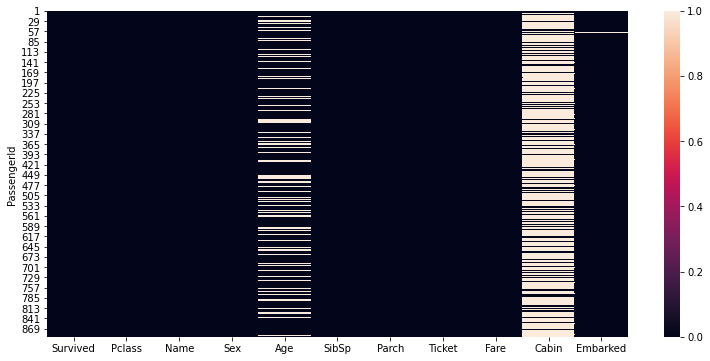

In [76]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull())
plt.show()

As we can see here there are a lot of null values present in cabin age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

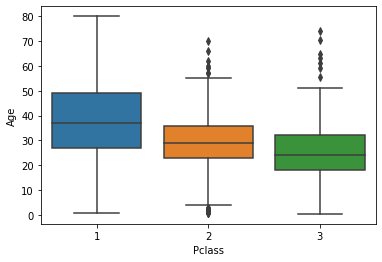

In [77]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [78]:
# we can observe the mean age on the basis of class they are present

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [79]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

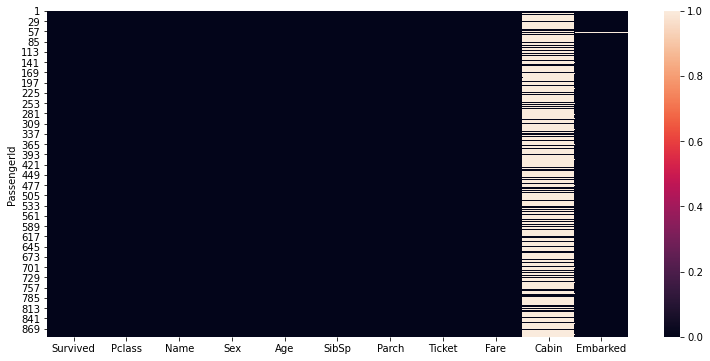

In [80]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull())
plt.show()

Now we will delete some columns which is not useful.

In [81]:
df['Ticket'].value_counts()

1601                 7
347082               7
CA. 2343             7
347088               6
3101295              6
                    ..
2672                 1
330919               1
36866                1
STON/O 2. 3101294    1
29751                1
Name: Ticket, Length: 681, dtype: int64

In [82]:
df['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
              ..
B41            1
C70            1
E31            1
C47            1
B38            1
Name: Cabin, Length: 147, dtype: int64

In [83]:
df.drop(['Name','Ticket', 'Cabin'], axis=1, inplace=True)

### Converting 'Embarked' and 'Sex' columns into categorical column.

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [85]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


## Checking for correlation 

<AxesSubplot:>

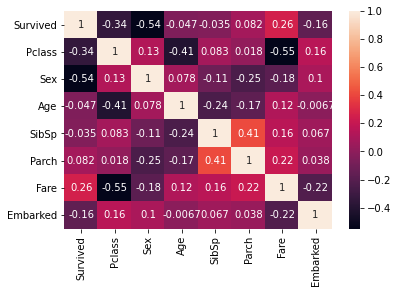

In [86]:
sns.heatmap(df.corr(), annot=True)

Here we can see correlation between different varibles. The correlation is not very strong here.

<AxesSubplot:xlabel='Survived', ylabel='count'>

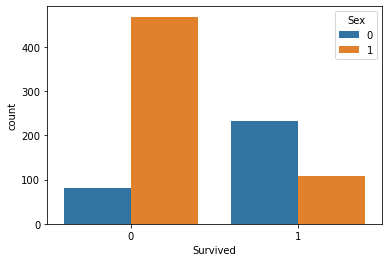

In [107]:
sns.countplot('Survived', hue='Sex', data=df)

Here we can observe that majority of people who can't survive are male.

<AxesSubplot:xlabel='Survived', ylabel='count'>

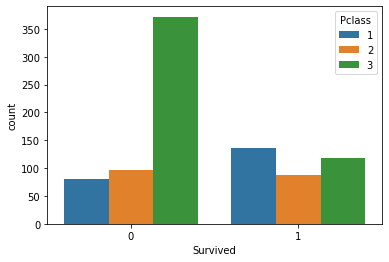

In [108]:
sns.countplot('Survived', hue='Pclass', data=df)

The majority of people died are belong to 3 class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

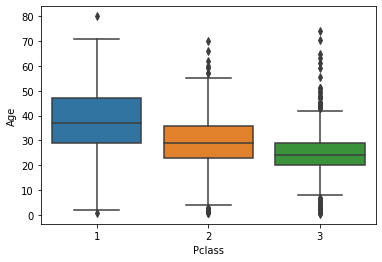

In [110]:
sns.boxplot(x='Pclass', y='Age', data=df)

We can see here, the wealthier passenger in the first class and second class tends to actully a bit older than passengers in third class.

In [112]:
x = df.drop('Survived', axis=1)
y = df['Survived']

## Finding best random state

In [113]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8677966101694915 on Random State:  150


We have found best random_state value as 150. We will create our train_test_split using random_state(150)

## Creating train test split 

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=150)

In [115]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.8677966101694915
[[162  14]
 [ 25  94]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       176
           1       0.87      0.79      0.83       119

    accuracy                           0.87       295
   macro avg       0.87      0.86      0.86       295
weighted avg       0.87      0.87      0.87       295

f1_Score: 0.8281938325991188


In [116]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.7084745762711865
[[141  35]
 [ 51  68]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       176
           1       0.66      0.57      0.61       119

    accuracy                           0.71       295
   macro avg       0.70      0.69      0.69       295
weighted avg       0.70      0.71      0.70       295

f1_Score: 0.6126126126126127


In [117]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.6813559322033899
[[166  10]
 [ 84  35]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       176
           1       0.78      0.29      0.43       119

    accuracy                           0.68       295
   macro avg       0.72      0.62      0.60       295
weighted avg       0.71      0.68      0.64       295

f1_Score: 0.426829268292683


In [119]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.8305084745762712
[[151  25]
 [ 25  94]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       176
           1       0.79      0.79      0.79       119

    accuracy                           0.83       295
   macro avg       0.82      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295

f1_Score: 0.7899159663865545


We are getting highest f1_score with Logistic Regression(82%) but it can be due overfitting also so we will check cross validation scores.

In [120]:
scr = cross_val_score(lr, x, y, cv=5)
print('Cross validation score for Logistic regression:',scr.mean()*100)

Cross validation score for Logistic regression: 79.57567007720796


In [121]:
scr = cross_val_score(knn, x, y, cv=5)
print('Cross validation score for K Nearest Neighbors:', scr.mean()*100)

Cross validation score for K Neares Neighbors: 69.249262444291


In [122]:
scr = cross_val_score(svc, x, y, cv=5)
print('Cross validation score for SVC:', scr.mean()*100)

Cross validation score for SVC: 67.57328479065971


In [123]:
scr = cross_val_score(gnb, x, y, cv=5)
print('Cross validation score for GaussianNB:', scr.mean()*100)

Cross validation score for GaussianNB: 78.90339589479632


Minimum Difference in accuracy and cross validation score is for GaussianNB so this is our best model

## Hyper parameter tuning

In [126]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
GCV = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
GCV.fit(x_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [127]:
GCV.best_params_

{'var_smoothing': 2.848035868435799e-06}

In [131]:
mod = GaussianNB(var_smoothing= 2.848035868435799e-06)
mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print('f1 score:', f1_score(y_test, pred)*100)

f1 score: 78.29787234042553


## Plotting AUC ROC curve

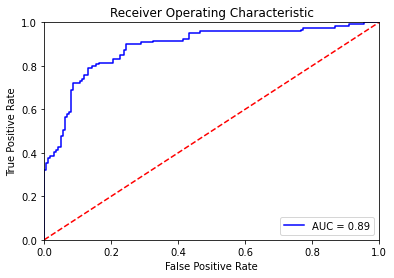

In [132]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gnb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Saving model

In [134]:
joblib.dump(mod, 'titanicmodel.pkl')

['titanicmodel.pkl']

## Loading the saved model

In [136]:
model = joblib.load('titanicmodel.pkl')
prediction = model.predict(x_test)
print(accuracy_score(y_test, prediction)*100)

82.71186440677965


In [137]:
prediction =pd.DataFrame(prediction)

In [138]:
prediction.to_csv('result_titanic.csv')

In [139]:
prediction

,0
0,0
1,0
2,1
3,1
4,0
...,...
290,0
291,0
292,0
293,0
